In [1]:
import numpy as np
import pandas as pd
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline

# Data Science in `Python`: `Numpy` and `Pandas`

Unlike base `R`, base `Python` is much lighter on the structure you have available that `R`. Lucky there is 2 packages that contain a lot structure that is used in data analysis.

## `Numpy`
`Numpy` is a package which gives you access to `matrix` and `array` structure. The following are some examples of the strengths of `Numpy`. 

Note that we loaded in `Numpy` with 

`import numpy as np` 

so we must use `np.[function]` to use the functions of the `numpy` module.

### Basic structure

Below I show you 
1. How to make your own vectors and arrays,
2. Shortcuts for arrays with ones or zeros (Extra: look up `np.diag` and try to make an identity matrix.)
3. Integer Sequences (notice how they are different than `R`'s)
4. Non - Integer ranges

In [2]:
# 1. making you own vectors and arrays
vec = np.array([1,2,1,4])
mat = np.array([[1.,0,0],
                [3.,2.,1.]])
print("vec")
print(vec, "Shape:", vec.shape)
print("mat")
print(mat, "Shape:", mat.shape)

vec
[1 2 1 4] Shape: (4,)
mat
[[1. 0. 0.]
 [3. 2. 1.]] Shape: (2, 3)


In [3]:
# 2. shortcuts for zeros and ones
zero_vec = np.zeros(3)
one_mat = np.ones((3,1))

print("zero_vec")
print(zero_vec, "Shape:", zero_vec.shape)
print("one_mat")
print(one_mat, "Shape:", one_mat.shape)

zero_vec
[0. 0. 0.] Shape: (3,)
one_mat
[[1.]
 [1.]
 [1.]] Shape: (3, 1)


In [4]:
# 3. Integer sequences
zero_idx_range = np.arange(5) # note it doesn't include 5 (but does include 0)
one_idx_range = np.arange(1,6)

print("zero_idx_range")
print(zero_idx_range, "Shape:", zero_idx_range.shape)
print("one_idx_range")
print(one_idx_range, "Shape:", one_idx_range.shape)

zero_idx_range
[0 1 2 3 4] Shape: (5,)
one_idx_range
[1 2 3 4 5] Shape: (5,)


In [5]:
# 4. non-integer ranges
tenth = np.linspace(0,1,num = 11) # 11 numbers

print("tenth:")
print(tenth, "Shape:", tenth.shape)

tenth:
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] Shape: (11,)


### basic matrix operations and transformations

If we would like to transpose a matrix `X` we use `X.T`, if you would like matrix multiplication we do `X.dot(Y)`.

If you'd like to reshape a matrix, you can use `X.reshape((a,b))` if you'd like a matrix to turn into a vector you can do `X.ravel()`. 

In [6]:
vec_t = vec.T

print("vec:", vec, "Shape:", vec.shape)
print("vec_t:", vec_t, "Shape:", vec_t.shape)

print("\n")

mat_t = mat.T
print("mat: \n", mat, "Shape:", mat.shape)
print("mat_t: \n", mat_t, "Shape:", mat_t.shape)



vec: [1 2 1 4] Shape: (4,)
vec_t: [1 2 1 4] Shape: (4,)


mat: 
 [[1. 0. 0.]
 [3. 2. 1.]] Shape: (2, 3)
mat_t: 
 [[1. 3.]
 [0. 2.]
 [0. 1.]] Shape: (3, 2)


In [7]:
mat_mult = mat.dot(one_mat)
print("mat.dot(one_mat)\n",
     mat, "\n**dot**\n", one_mat,
     "\n = \n",
     mat_mult)

mat.dot(one_mat)
 [[1. 0. 0.]
 [3. 2. 1.]] 
**dot**
 [[1.]
 [1.]
 [1.]] 
 = 
 [[1.]
 [6.]]


In [8]:
vec_to_mat = vec_t.reshape((2,2))

print("vec:", vec, "Shape:", vec)
print("vec_to_mat:\n",vec_to_mat, "Shape:", vec_to_mat.shape)


vec: [1 2 1 4] Shape: [1 2 1 4]
vec_to_mat:
 [[1 2]
 [1 4]] Shape: (2, 2)


In [9]:
mat_to_vec = mat.ravel()

print("mat:\n", mat, "Shape:", mat.shape)
print("mat_to_vec:",mat_to_vec, "Shape:", mat_to_vec.shape)

mat:
 [[1. 0. 0.]
 [3. 2. 1.]] Shape: (2, 3)
mat_to_vec: [1. 0. 0. 3. 2. 1.] Shape: (6,)


### Basic functions on matrices

We can summary style functions on `np.array`s in multiple ways. We provide examples with 
1. `np.sum`,
2. `np.mean`
3. and raising a matrix (element-wise) to a higher power (this can extend to element-wise multiplication, etc).

In [10]:
# 1. sum
full_sum = np.sum(vec_to_mat) # overall sum
col_sum = np.sum(vec_to_mat,axis = 0) # axis = 0 is by column, axis = 1 is by row 

## this can also be done:

full_sum = vec_to_mat.sum()
col_sum = vec_to_mat.sum(axis = 0)

print("full_sum:", full_sum)
print("col_sum:")
print(col_sum, "Shape:", col_sum.shape)

full_sum: 8
col_sum:
[2 6] Shape: (2,)


In [11]:
# 2. np.mean
row_mean = np.mean(vec_to_mat, axis = 1)
# or
row_mean = vec_to_mat.mean(axis = 1)

print("row_mean:")
print(row_mean, "Shape:", row_mean.shape)

row_mean:
[1.5 2.5] Shape: (2,)


In [12]:
# 3. element-wise power
vec_to_mat ** 2

array([[ 1,  4],
       [ 1, 16]])

### Subsetting in `numpy`
Note that subsetting in `pandas` is different. Remember that python is **Zero-indexed**.

In [13]:
#First element in mat_to_vec:
mat_to_vec[0]
#Last element in mat_to_vec:
mat_to_vec[-1]

1.0

In [14]:
# Element in the 1st row and 2nd column of vec_to_mat:
vec_to_mat[0,1]

2

In [15]:
# taking the full second column of vec_to_mat:
vec_to_mat[:,1]

array([2, 4])

### Moving between lists, and different types of matrix

All the above examples have used integers (and the last part showed that the `np.array` could hold floats. We can also hold strings. Note: you have to be specific if you'd like to hold both (think `pandas` if you would like to hold both).

In [16]:
str_list = ["Ben", "gets", "bored", "if", "no", "one", "goes", "to", "OHs"]

str_array = np.array(str_list)
print(str_array)

['Ben' 'gets' 'bored' 'if' 'no' 'one' 'goes' 'to' 'OHs']


In [17]:
basic_num = np.arange(9)

str_and_int = np.array([str_array, basic_num], dtype = np.object) 
#^ dtype needs to be np.object
print(str_and_int)
just_str = np.array([str_array, basic_num])
print(just_str)

[['Ben' 'gets' 'bored' 'if' 'no' 'one' 'goes' 'to' 'OHs']
 [0 1 2 3 4 5 6 7 8]]
[['Ben' 'gets' 'bored' 'if' 'no' 'one' 'goes' 'to' 'OHs']
 ['0' '1' '2' '3' '4' '5' '6' '7' '8']]


### Covert `numpy` to `pandas`:

In [18]:
str_and_int_pd = pd.DataFrame(str_and_int.T, columns = ["String", "Integer"])
str_and_int_pd

,String,Integer
0,Ben,0
1,gets,1
2,bored,2
3,if,3
4,no,4
5,one,5
6,goes,6
7,to,7
8,OHs,8


# Understanding / thinking about `Sklearn` usage

`Sklearn` is a `python` based package. That means `class` based code functionality. We will give you an example that showcases some of `Sklearn`'s organization. `Sklearn`'s website [scikit-learn.org/](http://scikit-learn.org/) provides good examples and should definitely be visited throughout this semester.

## Linear Regression

Linear Regression in `Sklearn` is stored within `linear_model` module. 

In [19]:
from sklearn import linear_model

You **first** set up a descriptor of the technique you would like to use. For regression you don't have a lot of useful options, but parameters include

`fit_intercept=True` and `normalize=False`
which tell your whether you include and intercept in the model and if you normalize the $X$ matrix first.

In [20]:
lin_reg = linear_model.LinearRegression()

**Let's set up and $X$ and $y$:**

Notice that `scipy.stats` also uses this `class` base structure where attributes are first generalized in a larger class and then applied in later functionalities.

In [21]:
scipy.random.seed(927) # for reproducibility 

gaussian_3d = scipy.stats.multivariate_normal(mean = np.zeros(3),
                                    cov = np.diag(np.ones(3)))
gaussian_1d = scipy.stats.multivariate_normal(mean = np.zeros(1),
                                    cov = 1)
X = gaussian_3d.rvs(size = 100)
beta = np.array([1,5,0])

y = X.dot(beta) + gaussian_1d.rvs(size = 100)

**Now**, let's train the model:

In [22]:
lm_output = lin_reg.fit(X = X,y = y)

`lm_output` contains some information you would find in `R`'s `lm` output, for example: 

$\hat{\beta}$ (`lm_output.coef_`):  

In [23]:
beta_hat = lm_output.coef_
np.round(beta_hat,4)

array([ 0.9118,  4.8058, -0.0518])

But a lot of summary attributes can be extracted with other libraries in `Sklearn`. `lm_output` also provides use a way to predict on new $X$ or even the $X$ we trained on:

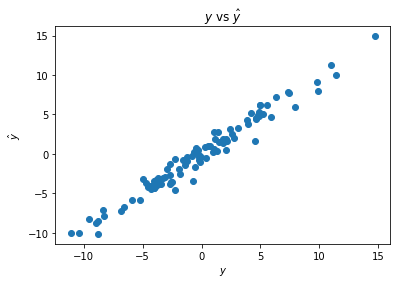

In [24]:
yhat = lm_output.predict(X)

# basic graphic:
fig, ax = plt.subplots()
ax.scatter(y, yhat)
ax.set(xlabel = r"$y$",
       ylabel = r"$\hat{y}$",
       title = r"$y$ vs $\hat{y}$");

**Need $R^2$, $MSE$ or other metrics?** `Sklearn` stores those in the `sklearn.metrics` module. 

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y, yhat)
mse = mean_squared_error(y, yhat)


df_metrics = pd.DataFrame({"names": ["R^2","MSE"],"metrics": np.round([r2, mse],3)},
                         columns = ["names","metrics"])
df_metrics

,names,metrics
0,R^2,0.967
1,MSE,0.814


Just a Random example of a inputed table:

$R^2$ | MSE 
--- | ---
0.967| 0.814

**Sadly `Sklearn`'s linear regression code doesn't provide summary statistics we are used to in `R` (which is why we are also showing you `StatsModels`. **

Although I'm not going to generate an example `Sklearn` also has a **Cross Validation** module that is a good add on.

---

---

# Working with R in `jupyter` notebooks

In this section, we give examples of using `rpy2`, the `%%R magic`, and `rpy2.robjects`'s `pandas2ri`. 

You'll find you can use `R` write in the `jupyter` notebook, with the ability to move `pandas` `Data Frame` in (and out) of the `R` environment. 

The following example `ggplot` in `R` as well as `tidyverse` in `R` function. Although the extra visualizations showed that there is a `ggplot` for `python` - feel free to lean back on `R` graphics.

## Just setting up a `pd.DataFrame`  to pipe in

In [26]:
d = {"Name": ["Bob","Jill","Billy","Gary","Susan","Sarah","Aaron"],
    "Sex":   ["M"  ,"F"   ,"M"    ,"M"   ,"F"    ,"F"    ,"M"],
    "Height":[72   ,65    ,73     , 65   , 63    , 68    , 67]}

df = pd.DataFrame(data = d,columns = ["Name","Sex","Height"])
df

,Name,Sex,Height
0,Bob,M,72
1,Jill,F,65
2,Billy,M,73
3,Gary,M,65
4,Susan,F,63
5,Sarah,F,68
6,Aaron,M,67


## Ability to use `%%R` Magic comes from the following lines

In [27]:
import rpy2
%load_ext rpy2.ipython

### Example of using `%%R` and piping in the `pd.DataFrame` `df`

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



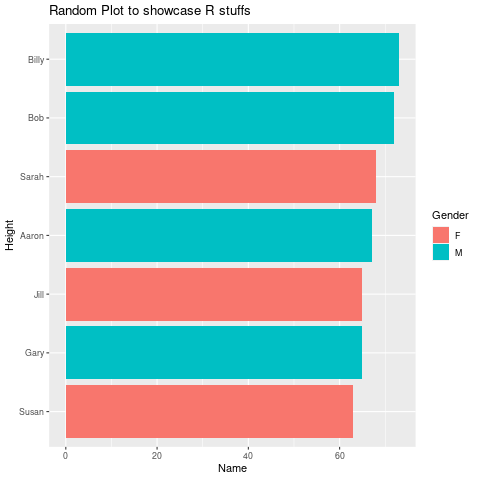

In [28]:
%%R -i df
#^ see how we did that (it passes the df data frame into R)
library(tidyverse)
library(forcats)

ggplot(df,aes(x = fct_reorder(Name,Height), y = Height, 
              fill = factor(Sex))) + 
    geom_bar(stat = "identity") + 
    coord_flip() +
    labs(x = "Height",
         y = "Name",
         fill = "Gender",
         title = "Random Plot to showcase R stuffs")


### Example of using `%%R` and piping in the `pd.DataFrame` `df` and pipe out random_summary

The next section pipes back the output `R` `data.frame` and converts it to a `pd.DataFrame`

In [29]:
%%R -i df -o random_summary
# ^we're now bringing in df and outputting random_summary

# lets make some easy calculations
random_summary <- df %>% 
                    group_by(Sex) %>% 
                    summarize(h = mean(Height))

`summarise()` ungrouping output (override with `.groups` argument)


In [30]:
random_summary

,Sex,h
1,F,65.333333
2,M,69.250000


Note: In some circumstances, you need to manually convert the converted data frames back to pandas data frames.
    See https://rpy2.github.io/doc/v3.0.x/html/generated_rst/pandas.html